# <span style='background :#D6DBDF ' > **Topic: Stroke Prediction**

#### Overview
1. Purpose
2. Data and python packages importing
3. Data cleaning process
4. Exploratory Data Analysis (EDA)<br>
    4.1 Categories Data<br>
    4.2 Continuous data
5. Data Preprocessing<br>
    5.1 Binary Categories (Gender and Ever Married)<br>
    5.2 Multicategory

# <font color="MidnightBlue">1. Purpose

> ML VS Keras ???

# <font color="MidnightBlue">2. Data and Python packages importing

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/anyamanee/stroke_prediction/main/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bm,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# <font color="MidnightBlue">3. Data cleaning process

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bm                 4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bm                   201
smoking_status         0
stroke                 0
dtype: int64

   > จากข้อมูลทั้งหมดพบ 201 missing values ในคอลัมน์ 'bm'<br>
   > เราจึงดูรายละเอียดค่าทางสถิติของข้อมูลในคอลัมน์ 'bm' เพื่อเลือกวิธีจัดการกับ missing value

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


> จากตารางข้อมูลทางสถิติด้านบน ค่าเฉลี่ยน และค่ากลางของคอลัมน์ 'bm' มีค่าใกล้เคียงกันที่ 28.89 และ 28.01 ตามลำดับดังนั้น จึงอ้างอิงได้ข้อมูลในคอลัมน์ 'bm' มีการแจกแจงแบบปกติ เราจึงเลือกจัดการกับ missing value ด้วยค่าเฉลี่ย

In [8]:
df.bm.mean()

28.893236911794666

In [9]:
df_mod = df
df_mod['bm'] = df_mod['bm'].fillna(df.bm.mean())
df_mod.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bm                   0
smoking_status       0
stroke               0
dtype: int64

> จากรายละเอียดด้านบนไม่พบ missing value แล้ว<br>
> หากอ้างอิงจากตารางสถิติด้านบนในคอลัมน์ 'Age' พบว่าค่าน้อยที่สุดในคอลัมน์นั้นมีค่าน้อยกว่า 1

In [10]:
df_check = df_mod.age[df_mod.age <1]
print(f'number of rows where the age is less than one: {len(df_check)}')
print(f'% of rows where the age is less than one: {( len(df_check)/df_mod.shape[0] )*100:.2f}%')

number of rows where the age is less than one: 43
% of rows where the age is less than one: 0.84%


> พบข้อมูล 43 แถวที่มีค่าในคอลัมน์ 'Age' น้อยกว่า 1 หรือคิดเป็นเพียง 0.84% จากข้อมูลทั้งหมดเท่านั้น ดังนั้นเราจึงเปลี่ยนค่าที่น้อยกว่า 1 ในคอลัมน์ 'Age' ให้มีค่าเป็น 1 ทั้งหมด

In [11]:
df_mod.loc[df_mod['age'] < 1,"age"] = 1
df_mod.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bm,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.230677,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.605002,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,1.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# <font color="MidnightBlue">4. Exploratory Data Analysis (EDA)

## <font color="MidnightBlue">4.1 Categories Data

In [27]:
header = df_mod.columns

sns.set_theme(style="darkgrid")

def plot_detail(ax1, records):
    total = len(records)
    for p in ax1.patches:
        value = '({:.0f})'.format(p.get_height())
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + 0.05 + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height() + 40
        ax1.annotate(percentage, (x, y), size = 12, ha = 'right')
        ax1.annotate(value, (x,y), size = 12)
        

def plot_category(col_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1 = sns.countplot(x=col_name, data = df_mod, ax=ax1)
    ax2 = sns.countplot(x=col_name, hue ="stroke", data = df_mod, ax=ax2)

    plot_detail(ax1, df_mod.gender)
    ax1.set_title(col_name, size = 20)
    ax1.set_xlabel(col_name, size = 15)
    ax1.set_ylabel("Number of Patient", size = 15)

    plot_detail(ax2, df_mod.gender)
    ax2.set_title(f"{col_name} with stroke", size = 20)
    ax2.set_xlabel(col_name, size = 15)
    ax2.set_ylabel("Number of Patient", size = 15)

    plt.show()

### <font color="MidnightBlue"> Gender

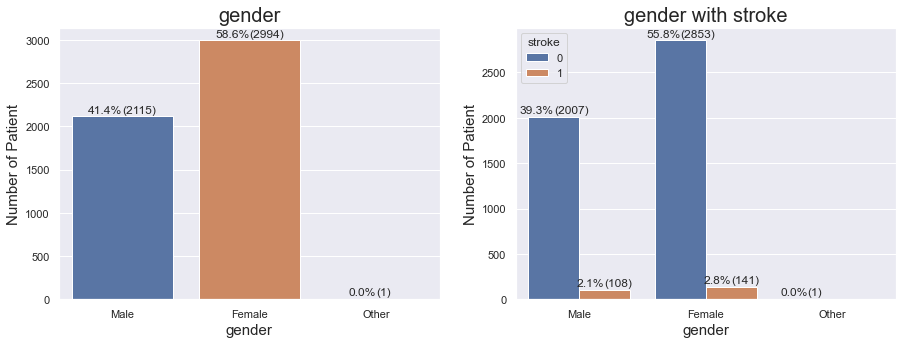

In [28]:
plot_category("gender")

จากข้อมูลทางการแพทย์ทั้งหมด 5,110 ราย 
- พบว่ามีผู้หญิง 2,979 (58%) และผู้ชาย 2,087 (41%) โดยมีผู้หญิงมากกว่าผู้ชาย 892 คน
- จำนวผู้ป่วยโรคหลอดเลือดสมองในผู้หญิง และผู้ชายมีจำนวนใกล้เคียงคือ 141 และ 108 คนตามลำดับโดยคิดเป็น 2.8% และ 2.1% จากทั้งหมด

### <font color="MidnightBlue"> Hypertension

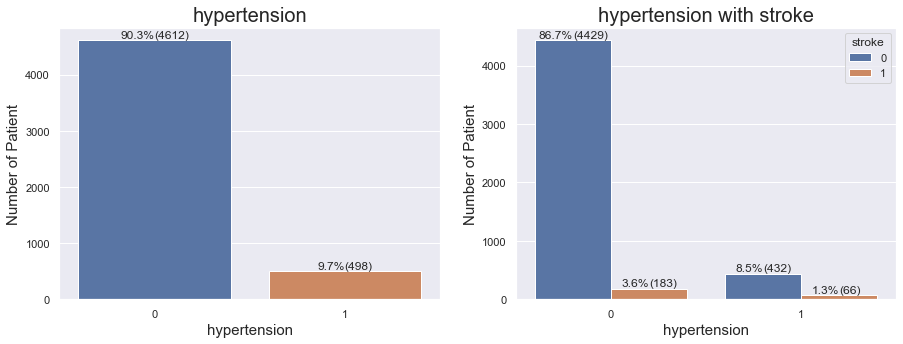

In [29]:
plot_category("hypertension")

- จำนวนคนที่เป็น Hypertension คิดเป็น 9.7% จากจำนวนคนทั้งหมด
- 3.6% เป็นคนที่มีอาการ stroke เพียงอย่างเดียว ในขณะที่ 1.3% เป็นคนที่มมีอาการ stroke ร่วมกับ Hypertension

### <font color="MidnightBlue"> Heart Disease

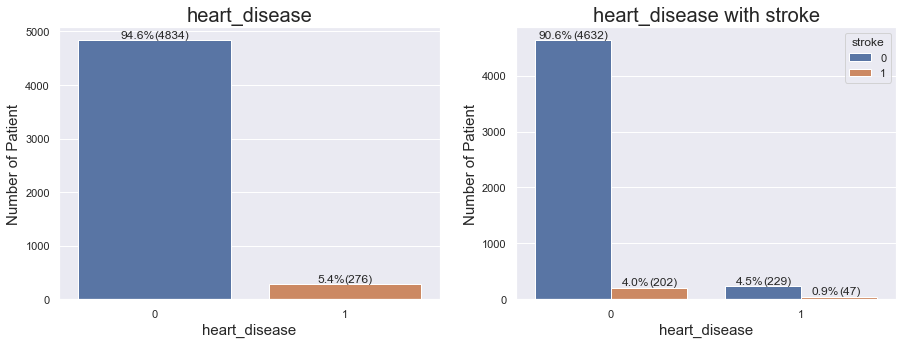

In [30]:
plot_category("heart_disease")

- จำนวนคนที่เป็น heart disease คิดเป็น 5.4% จากจำนวนคนทั้งหมด
- 4.0% เป็นคนที่มีอาการ stroke เพียงอย่างเดียว ในขณะที่ 0.9% เป็นคนที่มีอาการ stroke ร่วมกับ heart disease

### <font color="MidnightBlue"> Work Type

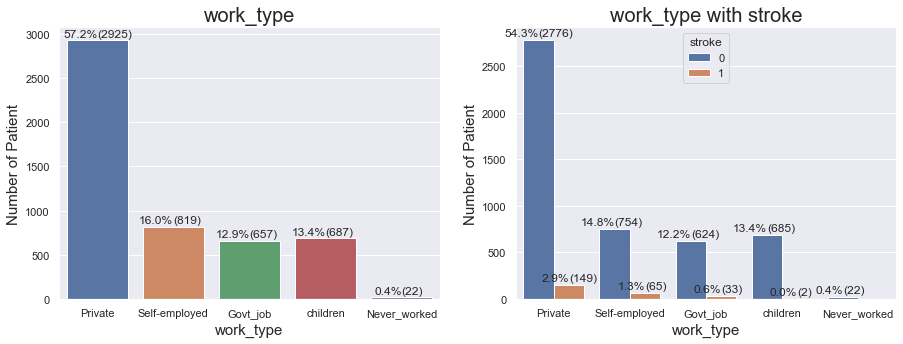

In [31]:
plot_category("work_type")

- ผู้ป่วยส่วนใหญ่กว่า 57.2% มี working type เป็น Private
- รองลงมาคือ Self-employed 16%, Government job 12.9% และ เป็นเด็ก 12.6%
- ในส่วนของผู้ป่วยที่ไม่ได้ทำงาน และ อื่นๆ มีจำนวนเพียงแค่ประมาณ 65คน

### <font color="MidnightBlue"> Ever Married

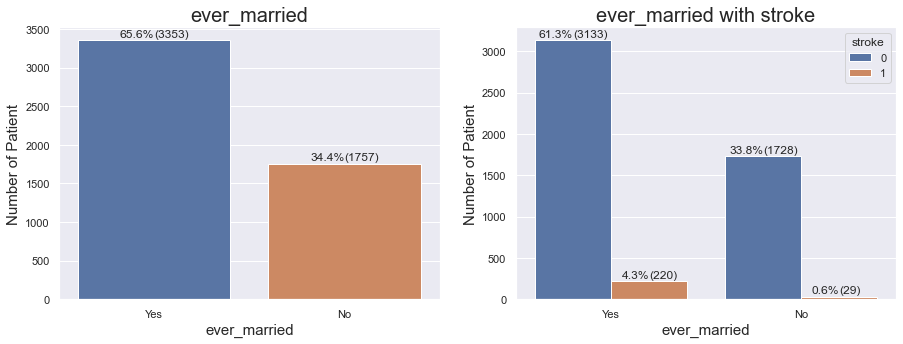

In [32]:
plot_category("ever_married")

- จำนวนคนที่แต่งงานแล้วคิดเป็น 65.6% จากจำนวนคนทั้งหมด

### <font color="MidnightBlue"> Residence Type

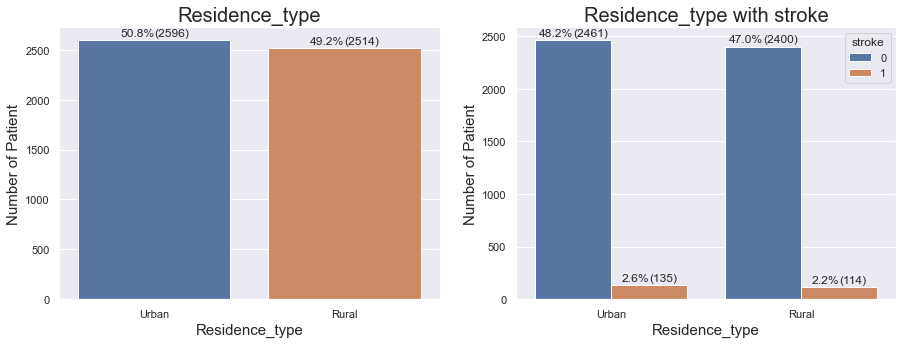

In [33]:
plot_category("Residence_type")

- ในส่วนของประเภทที่อยู่อาศัยของผู้ป่วย หรือ Residence type นั้น แบ่งออกเป็น Urban และ Rural ในปริมาณค่อนข้างใกล้เคียงกัน

### <font color="MidnightBlue"> Smoking Satus

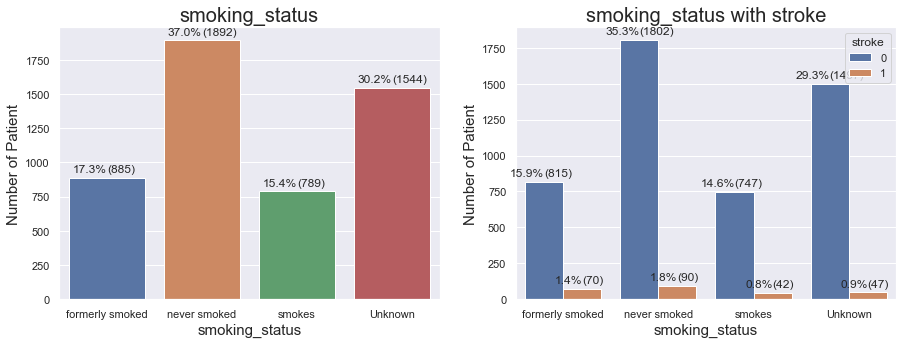

In [34]:
plot_category("smoking_status")

- มีจำนวนผู้ป่วยที่เป็น stroke ในปริมาณที่ใก้ลเคียงกันในทุกประเภทของประวัติการสูบบุหรี่

## <font color="MidnightBlue">4.2 Continuous data

In [54]:
def plot_continuous(col_name):
    fig, (ax1,ax2) = plt.subplots(2, figsize=(12, 10))
    sns.histplot(df_mod[df_mod['stroke'] == 0][col_name],bins=20, ax=ax1) # No Stroke - green
    sns.histplot(df_mod[df_mod['stroke'] == 1][col_name], color='chocolate',bins=20, ax=ax1) # Stroke - Red
    sns.boxplot(x=col_name, y = 'stroke', data = df_mod, hue_order=[0,1] , ax=ax2, orient='h')

    plt.title(f'No Stroke vs Stroke by {col_name}', fontsize=15)
    plt.show()

### <font color="MidnightBlue"> Avg Glucose Level

In [55]:
df_mod.groupby("stroke")["avg_glucose_level"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
1,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74


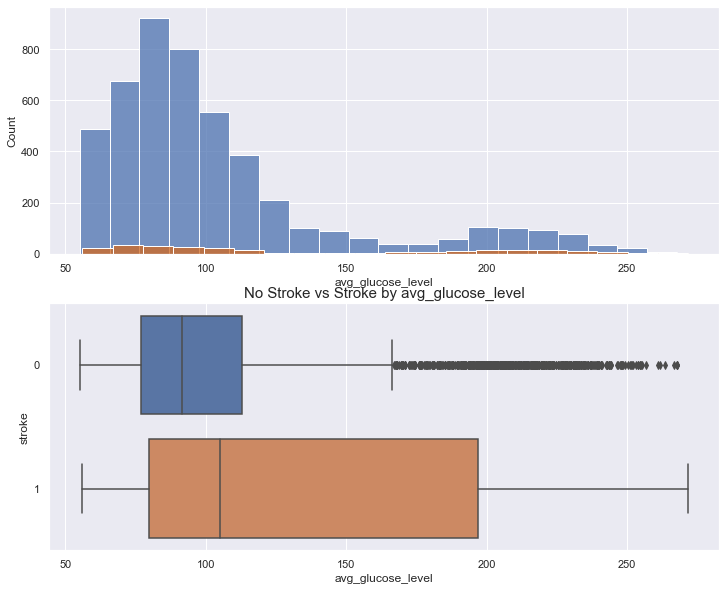

In [56]:
plot_continuous(header[8]) #Glucose

- Median ของปริมาณ glucose ในคนที่เป็น และ ไม่เป็น มีปริมาณใกล้เคียงกันที่ 91.47 และ 105.22 ตามลำดับ
- แต่ส่วนของคนที่มีอาการเป็น stroke มีการกระจายตัวมากกว่าคนที่ไม่เป็น โดยมีค่าระดับน้ำตาลในเลือดเฉลี่ยอยู่ในช่วงประมาณ 55 ถึง 130 ซึ่งเป็นการกระจายตัวจะมีลักษณะเป็น right skewed

### <font color="MidnightBlue"> BMI

In [57]:
df_mod.groupby("stroke")["bm"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,28.825388,7.776203,10.3,23.6,28.300000,32.8,97.6
1,249.0,30.217789,5.825589,16.9,27.0,28.893237,32.5,56.6


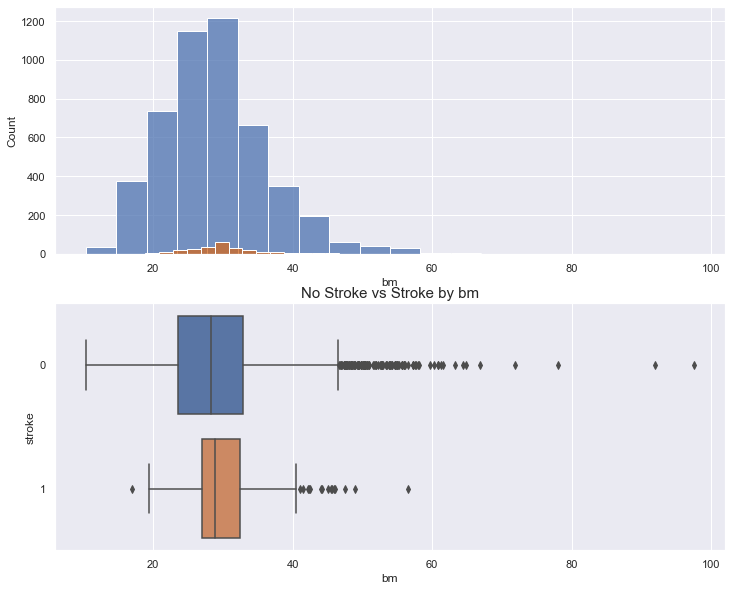

In [58]:
plot_continuous(header[9]) #BMI

- ค่า BMI ของคนที่เป็น และ ไม่เป็น มีแนวโน้มไปในทางเดียวกัน

### <font color="MidnightBlue"> Age

In [59]:
df_mod.groupby("stroke")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,41.975816,22.284029,1.00,24.0,43.0,59.0,82.0
1,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0


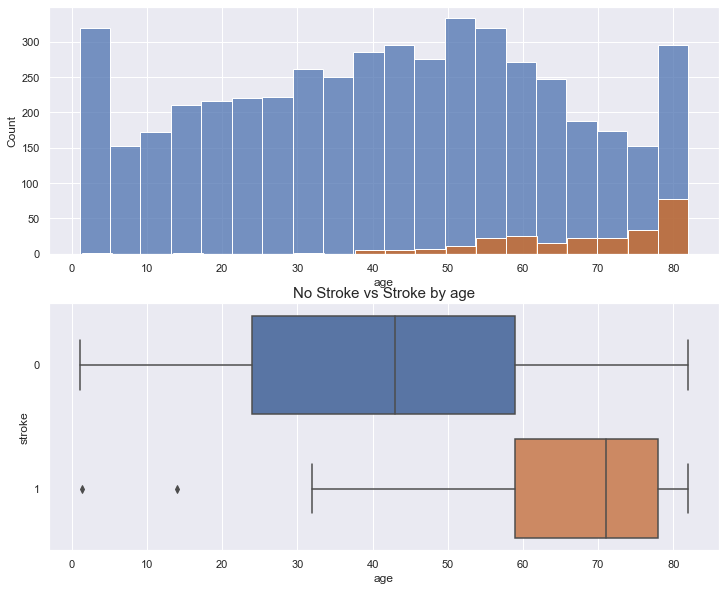

In [60]:
plot_continuous(header[2]) #Age

- ผู้ป่วยโรคหลอดเลือดสมองส่วนใหญ่จะเป็นผู้สูงอายุ หรือหากสังเกตุจากกราฟจะเริ่มพบผู้ป่วยโรคนี้ตั้งแต่อายุ 40 ปีขึ้นไป
- จาก boxplot การกระจายตัวของผู้ป่วยที่เป็น stroke อยู่ในช่วงอายุ มากกว่า 60 ปีขึ้นไป

# <font color="MidnightBlue">5. Data Preprocessing

In [61]:
df_preProcess = df_mod

In [62]:
df_check = df_preProcess.gender[df_preProcess.gender =='Other']
print(f'number of rows where the age is less than one: {len(df_check)}')
print(f'% of rows where the age is less than one: {( len(df_check)/df_preProcess.shape[0] )*100:.2f}%')

df_preProcess = df_preProcess.loc[df_mod.gender !='Other'] # drop 1 row of gender "Other"

number of rows where the age is less than one: 1
% of rows where the age is less than one: 0.02%


## <font color="MidnightBlue">5.1 Binary Categories (Gender and Ever Married)

In [44]:
idx_gender={"Female":0,"Male":1} 
df_preProcess.gender =df_preProcess.gender.apply(lambda x:idx_gender[x])

C:\Users\Mayypeeya\AppData\Local\Temp\ipykernel_46156\2896596743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preProcess.gender =df_preProcess.gender.apply(lambda x:idx_gender[x])


In [45]:
idx_married={"No":0,"Yes":1}
df_preProcess.ever_married = df_preProcess.ever_married.apply(lambda x:idx_married[x])

C:\Users\Mayypeeya\AppData\Local\Temp\ipykernel_46156\435846457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preProcess.ever_married = df_preProcess.ever_married.apply(lambda x:idx_married[x])


In [46]:
set(df_preProcess.ever_married)

{0, 1}

In [47]:
df_preProcess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bm                 5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 518.9+ KB


## <font color="MidnightBlue">5.2 Multicategory

In [48]:
idx_multiClassData = pd.get_dummies(df_preProcess[["work_type","Residence_type",'smoking_status']], prefix=['worktype','Residencetype','smokingstatus'])
print(idx_multiClassData.head())

   worktype_Govt_job  worktype_Never_worked  worktype_Private  \
0                  0                      0                 1   
1                  0                      0                 0   
2                  0                      0                 1   
3                  0                      0                 1   
4                  0                      0                 0   

   worktype_Self-employed  worktype_children  Residencetype_Rural  \
0                       0                  0                    0   
1                       1                  0                    1   
2                       0                  0                    1   
3                       0                  0                    0   
4                       1                  0                    1   

   Residencetype_Urban  smokingstatus_Unknown  smokingstatus_formerly smoked  \
0                    1                      0                              1   
1                    0            

In [49]:
df_preProcess= pd.concat([df_preProcess,idx_multiClassData], axis=1)

In [50]:
df_preProcess.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bm,...,worktype_Never_worked,worktype_Private,worktype_Self-employed,worktype_children,Residencetype_Rural,Residencetype_Urban,smokingstatus_Unknown,smokingstatus_formerly smoked,smokingstatus_never smoked,smokingstatus_smokes
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.600000,...,0,1,0,0,0,1,0,1,0,0
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,28.893237,...,0,0,1,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.500000,...,0,1,0,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.400000,...,0,1,0,0,0,1,0,0,0,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.000000,...,0,0,1,0,1,0,0,0,1,0


# Correlation

In [10]:
# Data Encoding: 
#1. Categorical

#2. Label



In [11]:
# Splitting the dataset into the Training set and Test set

In [12]:
# Handling Imbalance data using SMOTE

In [13]:
# Model Selection

In [14]:
# Keras ANN

[1] https://www.kaggle.com/code/siddheshera/stroke-eda-smote-9-models-90-accuracy
[2] https://www.kaggle.com/code/joshuaswords/predicting-a-stroke-shap-lime-explainer-eli5
[3]https://www.kaggle.com/code/bhuvanchennoju/data-storytelling-auc-focus-on-strokes

## Correlation

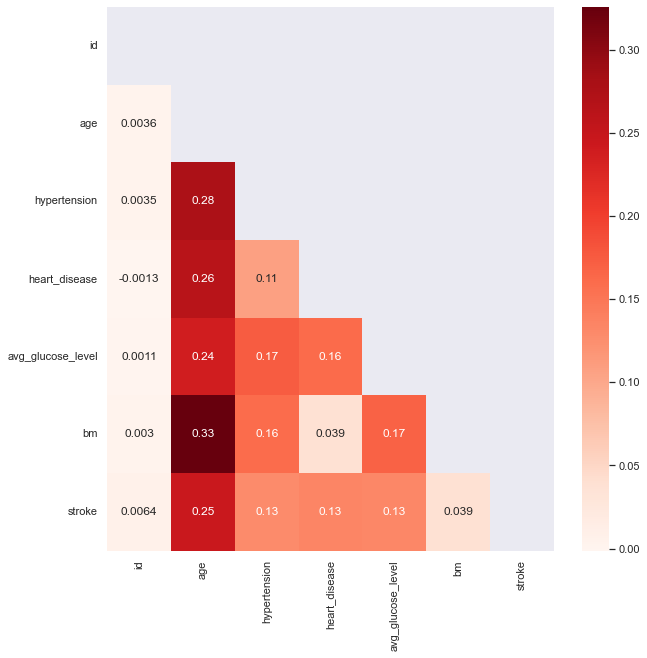

In [39]:
#Using Pearson Correlation
# Compute the correlation matrix
plt.figure(figsize=(10,10))
cor = df.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor,mask =mask, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["stroke"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.009]